# 0.) Import and Clean data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("/Users/bharatsingh/Downloads/Country-data.csv", sep = ",")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
names=df[["country"]].copy()
X=df.drop("country", axis=1)

In [6]:
scaler=StandardScaler().fit(X)
X_scaled=scaler.transform(X)

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

# 1.) Fit a kmeans Model with any Number of Clusters

In [7]:
KMeans?

In [8]:
kmeans=KMeans(n_clusters=5).fit(X_scaled)

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [9]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

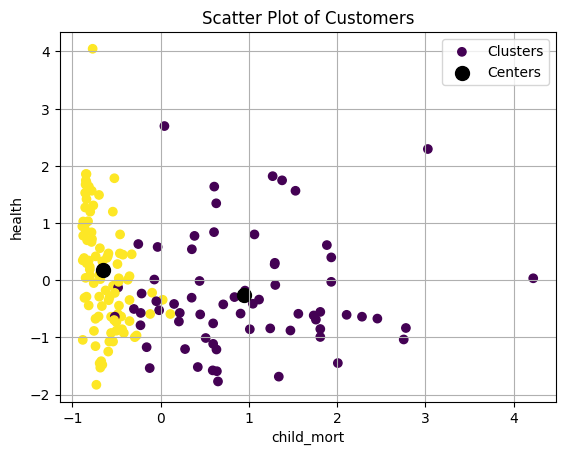

In [55]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 2


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [56]:
WCSSs=[]
Ks=range(1,15)
for k in Ks:
    kmeans=KMeans(n_clusters=k, n_init=30).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

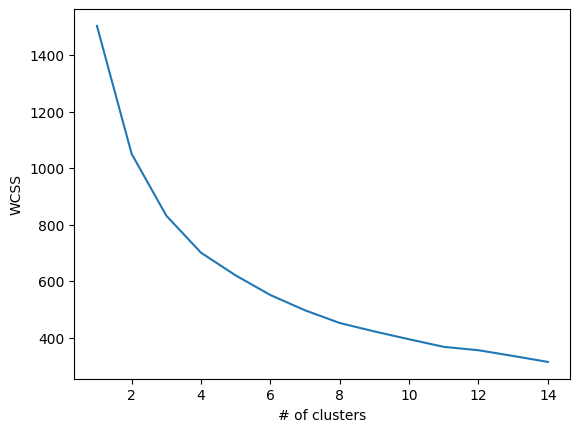

In [28]:
plt.plot(Ks, WCSSs)
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.show()

**By looking at the above graph, I would choose 8 as the optimal number of clusters for KMeans Algorithm. 8 is the elbow point of this graph, from where the decrease in WCSS with increase in # of clusters is linear. If we increase the clusters more, it will lead to overfitting.**

# 6.) Do the same for a silhoutte plot

In [36]:
from sklearn.metrics import silhouette_score

In [32]:
?silhouette_score

In [41]:
SSs=[]
Ks=range(2,15)
for k in Ks:
    kmeans=KMeans(n_clusters=k, n_init=30).fit(X_scaled)
    sil=silhouette_score(X_scaled,kmeans.labels_)
    SSs.append(sil)

In [38]:
kmeans.labels_

array([ 1, 12,  2,  7,  4,  2, 12,  5,  3,  2, 12,  4, 13, 12,  4,  3, 10,
        1, 10, 13, 12, 10, 12,  0,  4,  1,  1, 10,  1,  5, 10,  1,  1, 12,
       12, 12,  1,  1,  7, 12,  1, 12,  4,  4,  3, 12, 12, 13, 12,  7, 13,
        4, 10,  5,  5,  7,  1, 12,  5,  7,  5, 12, 12,  1,  1, 10, 11,  4,
        5, 13, 13,  2,  7,  3,  5,  5, 12,  5, 10,  2, 13,  9,  0, 10, 13,
        4,  4,  9,  9,  2,  4,  8,  4, 13,  1,  4,  4,  1,  8,  7,  4,  9,
        4,  2,  4, 12,  1, 13, 10, 13,  3,  5,  1,  6,  3,  2, 13,  4, 10,
       12, 13, 12,  5,  0, 12,  2,  1, 10,  2,  1, 12,  4,  1,  8,  4,  4,
       10, 10,  4,  5,  2, 10,  7, 12,  5,  3, 10,  1,  4,  1,  1, 10,  4,
       12, 10,  1, 12,  0,  5,  5, 12, 13, 10,  2,  4,  7,  1],
      dtype=int32)

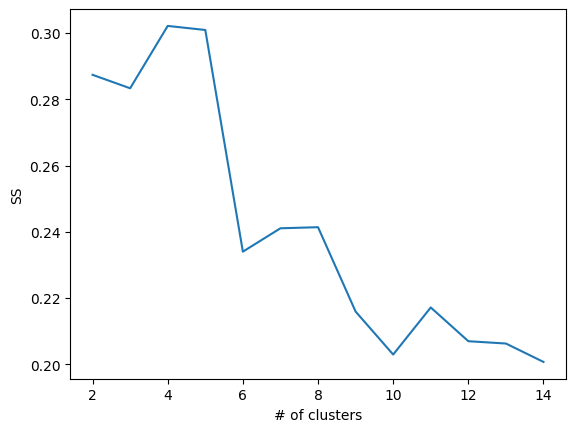

In [42]:
plt.plot(Ks,SSs)
plt.xlabel("# of clusters")
plt.ylabel("SS")
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [87]:
kmeans=KMeans(n_clusters=8, n_init=30).fit(X_scaled)

In [88]:
preds=pd.DataFrame(kmeans.labels_)

In [89]:
output=pd.concat([preds,df], axis=1)

In [90]:
print("Cluster 1: ")
list(output.loc[output[0]==0, "country"])

Cluster 1: 


['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States']

In [91]:
print("Cluster 2: ")
list(output.loc[output[0]==1, "country"])

Cluster 2: 


['Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Bolivia',
 'Brazil',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Grenada',
 'Guatemala',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Kazakhstan',
 'Libya',
 'Mongolia',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Peru',
 'Philippines',
 'Romania',
 'Russia',
 'Samoa',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Tonga',
 'Turkey',
 'Turkmenistan',
 'Uruguay',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela']

In [92]:
print("Cluster 3: ")
list(output.loc[output[0]==2, "country"])

Cluster 3: 


['Botswana',
 'Burundi',
 'Guinea-Bissau',
 'Haiti',
 'Kiribati',
 'Lesotho',
 'Liberia',
 'Micronesia, Fed. Sts.',
 'Namibia',
 'Rwanda',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Togo']

In [93]:
print("Cluster 4: ")
list(output.loc[output[0]==3, "country"])

Cluster 4: 


['Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Cambodia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Estonia',
 'Fiji',
 'Georgia',
 'Guyana',
 'Hungary',
 'Jordan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Panama',
 'Paraguay',
 'Poland',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Thailand',
 'Tunisia',
 'Ukraine',
 'Vietnam']

In [94]:
print("Cluster 5: ")
list(output.loc[output[0]==4, "country"])

Cluster 5: 


['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Kenya',
 'Lao',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Niger',
 'Pakistan',
 'Senegal',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Uganda',
 'Yemen',
 'Zambia']

In [95]:
print("Cluster 6: ")
list(output.loc[output[0]==5, "country"])

Cluster 6: 


['Nigeria']

In [96]:
print("Cluster 7: ")
list(output.loc[output[0]==6, "country"])

Cluster 7: 


['Brunei', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates']

In [97]:
print("Cluster 8: ")
list(output.loc[output[0]==7, "country"])

Cluster 8: 


['Luxembourg', 'Malta', 'Singapore']

The clustering based on developed and non-developed economies reveals some expected groupings, but also some surprises.

Firstly, it's unsurprising to see countries traditionally classified as highly developed, such as those in Cluster 8 (e.g., Australia, United States, United Kingdom), forming a distinct cluster. These nations share commonalities in terms of high levels of GDP per capita, advanced infrastructure, and robust healthcare and education systems.

Conversely, Cluster 5 includes countries typically categorized as less developed or developing, such as Afghanistan, Angola, and Burkina Faso. These nations often face challenges like high poverty rates, limited access to healthcare and education, and lower levels of economic development.

There are some unexpected groupings as well. For instance, Nigeria, an oil-rich nation with significant economic potential, appears in Cluster 7, which contains only one country. This grouping suggests that despite its considerable resources, Nigeria may face developmental challenges that align it more closely with less developed economies.

It's intriguing to note that some clusters contain only a few countries, such as Cluster 4 (Luxembourg, Malta, Singapore) and Cluster 6 (Brunei, Kuwait, Oman, Qatar, United Arab Emirates). These countries are characterized by small populations, high GDP per capita, and significant reliance on specific industries (e.g., finance, oil), which distinguish them from larger economies.

Overall, while many of the clustering results align with conventional notions of developed and non-developed economies, there are notable exceptions and nuances that provide insight into the complexities of global economic development.


# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [74]:
output.drop("country",axis=1).groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,86.535714,26.622857,9.945000,59.714286,3651.714286,5.877857,56.342857,4.153571,2060.500000
1,27.246667,30.244200,5.418667,34.261464,11424.222222,10.522244,72.126667,2.561111,5653.911111
2,14.018605,53.397674,7.066977,61.276744,15568.837209,3.861465,74.493023,1.903721,9415.953488
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
4,92.693939,30.469394,5.160606,38.300000,3679.969697,11.292273,60.375758,5.288788,1782.575758
5,10.120000,67.960000,2.742000,37.400000,76740.000000,12.596000,77.480000,2.178000,39680.000000
6,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000
7,4.295652,40.730435,10.513478,38.247826,40265.217391,1.334913,80.891304,1.810870,45417.391304


In [98]:
output.drop("country",axis=1).groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,1.065781,21.890833,1.967852,17.635936,8252.636421,2.001797,0.993576,0.380382,14413.114362
1,14.318329,14.335490,1.667824,14.338308,6154.058676,9.097471,3.739385,0.689916,3614.530095
2,48.827335,14.506325,2.319860,24.487543,4285.785583,4.411536,8.421375,1.041209,2415.694095
3,10.124762,16.082190,1.930544,13.857859,8856.605496,4.230473,3.758194,0.576281,7493.040504
4,26.317187,19.848412,1.668068,11.482949,5991.704174,7.665832,5.021891,0.884999,3160.634282
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.554016,9.108458,0.863852,14.417582,30065.290065,3.925005,1.570244,0.500536,18662.949035
7,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084


# 9.) Write an observation about the descriptive statistics.

The provided descriptive statistics unveil a diverse landscape of socioeconomic and health indicators across different clusters of countries. Notably, there is considerable variation in child mortality rates, with Cluster 6 standing out with the highest average rate, suggesting significant challenges in healthcare and child welfare.

Conversely, Cluster 3 exhibits the lowest average child mortality rate, indicating better access to healthcare services. Disparities in economic activity are evident through varying levels of exports and imports, with Clusters 3 and 7 displaying higher averages, reflecting stronger global trade integration. Cluster 3 also showcases the highest average health expenditure, indicating a prioritization of healthcare infrastructure. 

Moreover, Clusters 3 and 7 demonstrate higher average incomes and life expectancies, reflecting greater economic prosperity and better living conditions. However, Cluster 6, with the highest child mortality rate, also exhibits lower life expectancies and incomes, suggesting significant health and economic challenges. These observations underscore the diverse levels of development, economic stability, and healthcare accessibility across the different clusters of countries.
